In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
import random as rnd
from random import sample

In [32]:
census = pd.read_csv("CensusAndExpectancyIL.csv")

In [3]:
census.head(5)

,Unnamed: 0,Tract,FIPS,Area (Land),Total Population:,% Total Population: White Alone,% Total Population: Black or African American Alone,Population 25 Years and Over:,Civilian Population in Labor Force 16 Years and Over:,% Civilian Population in Labor Force 16 Years and Over: Employed,...,% Total: No Health Insurance Coverage,% Total: with Health Insurance Coverage,% Total: with Health Insurance Coverage: Public Health Coverage,% Total: with Health Insurance Coverage: Private Health Insurance,"% Households: Less than $39,999","% Households: $40,000 to $74,999","% Households: $75,000 or More",% High School or Less,% Bachelor's or More,Life Expectancy
0,0,Adams County 0001.00,17001000100,14087146,4607,90.71,6.19,3425,2329,92.79,...,3.15,96.85,48.10,68.76,35.96,34.71,29.32,40.52,21.55,85.3
1,1,Adams County 0002.01,17001000201,3206319,2003,90.66,6.54,1365,990,97.68,...,6.44,93.56,40.49,66.45,44.91,23.83,31.25,39.41,24.91,78.1
2,2,Adams County 0002.02,17001000202,1514956,2391,84.53,10.25,1541,1409,93.12,...,10.87,89.13,28.69,71.14,36.50,43.86,19.64,39.00,16.55,78.2
3,3,Adams County 0004.00,17001000400,4443142,3314,77.46,13.70,2311,1355,95.79,...,4.34,95.66,55.61,49.66,51.47,27.92,20.61,59.15,9.65,66.2
4,4,Adams County 0005.00,17001000500,1262517,2154,84.68,8.17,1458,839,96.31,...,7.33,92.67,50.08,50.66,50.82,32.92,16.26,52.81,13.17,71.6


# Question 1

# a.

In [4]:
predictors = ['% Households: $75,000 or More','% Total Population: Black or African American Alone', "% Bachelor's or More"]
outcome = "Life Expectancy"
model = LR()

In [33]:
new_census = pd.DataFrame()
for prd in predictors:
    new_census[prd] = census[prd]
new_census[outcome] = census[outcome] 

model.fit(new_census[predictors], new_census[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')
for prd, coef in zip(predictors, model.coef_):
    print(f'{prd}:{coef:.3f}')

Intercept: 74.423
Coefficients:
% Households: $75,000 or More:0.080
% Total Population: Black or African American Alone:-0.052
% Bachelor's or More:0.039


In [34]:
predictions = model.predict(new_census[predictors])
residuals = (new_census[outcome]) - predictions
std_residuals = residuals / residuals.std()

In [54]:
outliers = []
for i in std_residuals:
    if i >= 3:
        outliers.append(i)
    elif i <= -3:
        outliers.append(i)
print(outliers)

print("There are " + str(len(outliers)) + " outliers.")

[-3.5604244604124604, 3.681724961669097, 3.6827879114977886, -3.2346131579337136, -3.113282773315584, -4.098580801021978, 3.060679209887568, -3.4573355761677345, -3.3093032934843056, -3.915136900342377, -3.0168836388269225, -4.236757761339668, 3.3901401210286735, 3.691938289382849, -3.0494158999577867, 3.285148436732879, -3.1962315408829243, -4.582871459415914, 3.157614299537223, -4.274264963312092, 3.3510047356302266, 4.916860314972897, 3.4200709756787564, 3.257208973183437]
There are 24 outliers.


# b.

In [107]:
outlier_df = pd.DataFrame()
outlier_df["predictions"] = predictions
outlier_df['std_res'] = std_residuals
outlier_df['act_data'] = new_census[outcome]
for prd in predictors:
    outlier_df[prd] = new_census[prd]
outlier_df.reset_index()
outlier_df.head(5)

,predictions,std_res,act_data,"% Households: $75,000 or More",% Total Population: Black or African American Alone,% Bachelor's or More
0,77.281679,2.995194,85.3,29.32,6.19,21.55
1,77.548541,0.205994,78.1,31.25,6.54,24.91
2,76.102616,0.783465,78.2,19.64,10.25,16.55
3,75.731478,-3.560424,66.2,20.61,13.70,9.65
4,75.809257,-1.572342,71.6,16.26,8.17,13.17


In [114]:
outlier_df = outlier_df[outlier_df["std_res"].abs() >= 3]
outlier_df = outlier_df.reset_index()
outlier_df.head(5)

,index,predictions,std_res,act_data,"% Households: $75,000 or More",% Total Population: Black or African American Alone,% Bachelor's or More
0,3,75.731478,-3.560424,66.2,20.61,13.70,9.65
1,31,78.443792,3.681725,88.3,44.16,0.82,13.80
2,34,78.340947,3.682788,88.2,42.87,0.63,13.55
3,119,77.459261,-3.234613,68.8,38.28,35.51,46.90
4,160,75.634452,-3.113283,67.3,18.91,31.93,34.98


1

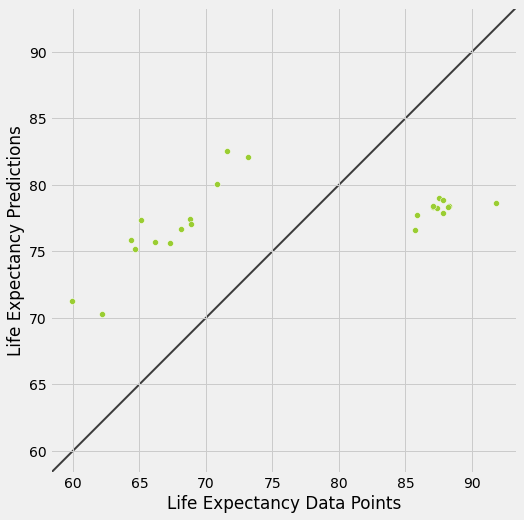

In [115]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x=outlier_df['act_data'], y=outlier_df["predictions"], color="yellowgreen")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, linewidth=2)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set(xlabel="Life Expectancy Data Points", ylabel="Life Expectancy Predictions")
1

#  c.

In [116]:
outlier_df.head(5)

,index,predictions,std_res,act_data,"% Households: $75,000 or More",% Total Population: Black or African American Alone,% Bachelor's or More
0,3,75.731478,-3.560424,66.2,20.61,13.70,9.65
1,31,78.443792,3.681725,88.3,44.16,0.82,13.80
2,34,78.340947,3.682788,88.2,42.87,0.63,13.55
3,119,77.459261,-3.234613,68.8,38.28,35.51,46.90
4,160,75.634452,-3.113283,67.3,18.91,31.93,34.98


In [117]:
outlier_df["std_res"].loc[3]

-3.2346131579337136

In [123]:
outlier_df['sign'] = np.where(outlier_df['std_res'] < 0 , "Negative", "Positive")
outlier_df

,index,predictions,std_res,act_data,"% Households: $75,000 or More",% Total Population: Black or African American Alone,% Bachelor's or More,sign
0,3,75.731478,-3.560424,66.2,20.61,13.70,9.65,Negative
1,31,78.443792,3.681725,88.3,44.16,0.82,13.80,Positive
2,34,78.340947,3.682788,88.2,42.87,0.63,13.55,Positive
3,119,77.459261,-3.234613,68.8,38.28,35.51,46.90,Negative
4,160,75.634452,-3.113283,67.3,18.91,31.93,34.98,Negative
5,202,82.572157,-4.098581,71.6,70.60,3.87,69.62,Negative
6,305,77.706371,3.060679,85.9,32.99,1.51,18.68,Positive
7,361,80.055503,-3.457336,70.8,50.58,6.87,50.07,Negative
8,377,82.059211,-3.309303,73.2,64.35,6.85,73.24,Negative
9,479,75.181066,-3.915137,64.7,27.15,65.01,50.64,Negative


In [124]:
signed = outlier_df.groupby(by=["sign"]).mean()
signed.drop(['index'], axis=1)

,predictions,std_res,act_data,"% Households: $75,000 or More",% Total Population: Black or African American Alone,% Bachelor's or More
sign,,,,,,
Negative,76.703283,-3.618854,67.015385,31.883846,29.275385,32.283846
Positive,78.225016,3.535925,87.690909,40.195455,1.762727,17.565455


The means of the two groups of the predictors "% Bachelor's or More" and "% Total Population: Black or African American Alone" seem to be very different.

# Question 2

# a.

[Text(0.5, 0, 'Predicted Life Expectany'), Text(0, 0.5, '|residuals|')]

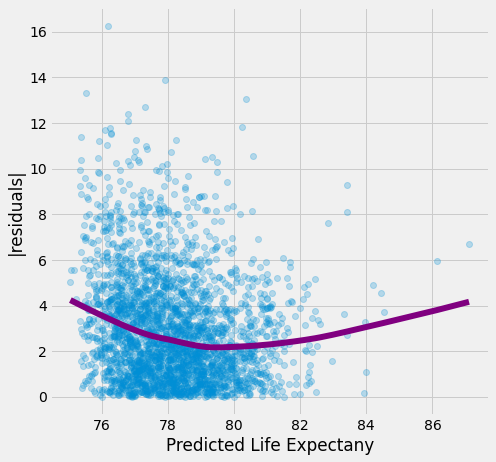

In [136]:
predictor1 = ["Civilian Population in Labor Force 16 Years and Over:"]
outcome = "Life Expectancy"
model1 = LR()
model1.fit(census[predictor1], census[outcome])
prediction1 = model1.predict(census[predictor1])

abs_resids1 = np.abs(prediction1 - census[outcome])
fig, ax = plt.subplots(figsize=(7, 7)) # square plot
sns.regplot(x=prediction1, y=abs_resids1, scatter_kws={"alpha": 0.25}, line_kws={'color':'purple'}, lowess=True, ax=ax)
ax.set(xlabel='Predicted Life Expectany', ylabel='|residuals|')

# b.

[Text(0.5, 0, 'Normally distributed data')]

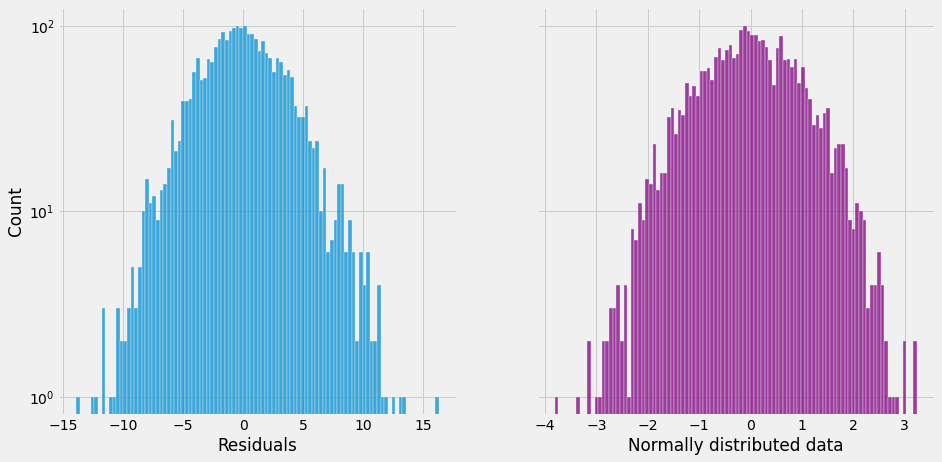

In [157]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(14, 7))

resids1 = prediction1 - census[outcome]
sns.histplot(data=resids1, bins=100, ax=ax1)
ax1.set_yscale('log')
ax1.set(xlabel='Residuals', ylabel='Count')

norm_dat = np.random.normal(loc=0.0, scale=1, size=3000)
sns.histplot(data=norm_dat, bins=100, ax=ax2, kde=False, color="purple")
ax2.set_yscale('log') # emphasize tails
ax2.set(xlabel = 'Normally distributed data')

They seem very similar. The distribution is very close to the appearance of a normal distribution.

# Question 3

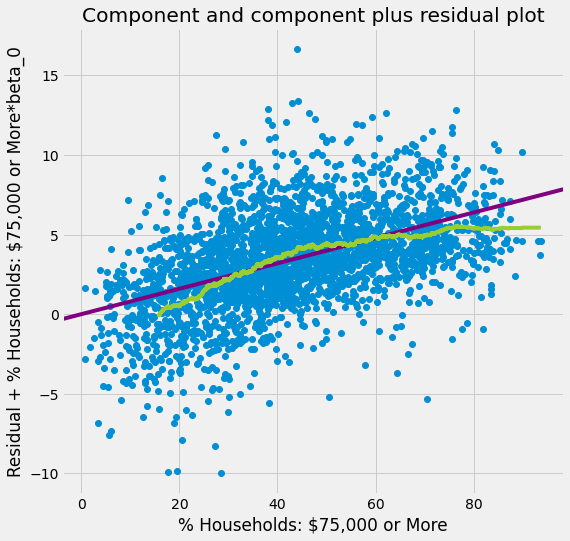

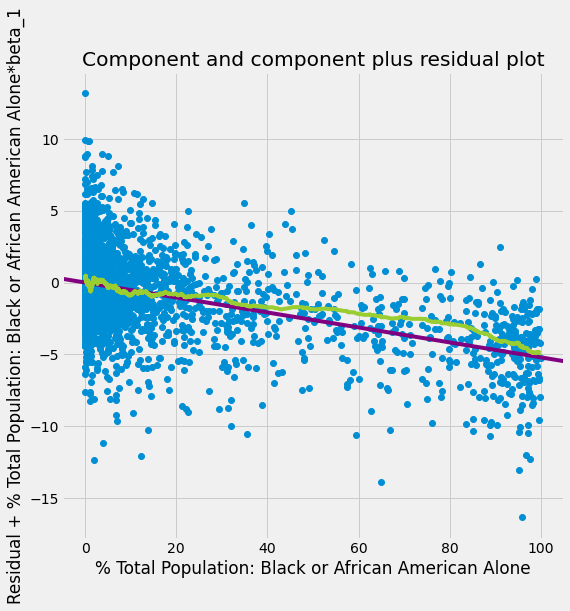

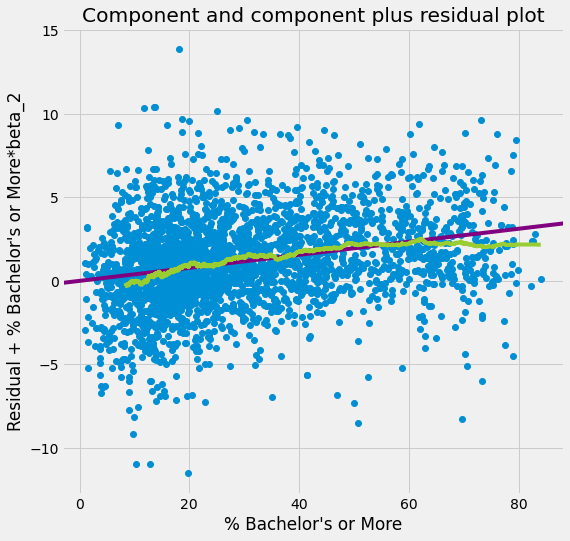

In [173]:
import statsmodels.api as sm
sm_mdl = sm.OLS(new_census[outcome], new_census[predictors].assign(const=1))
sm_result = sm_mdl.fit()
for prd in predictors:
    fig, ax = plt.subplots(figsize=(8, 8))
    sm.graphics.plot_ccpr(sm_result, prd, ax=ax)
    ax.lines[1].set_color('purple')
    coef = sm_result.params[prd]
    part_resid = sm_result.resid + coef*new_census[prd]
    df = pd.DataFrame({'x': new_census[prd], 'y': part_resid})
    df = df.sort_values(by='x')
    df['smth'] = df['y'].rolling(window=200).mean()
    plt.plot(df['x'], df['smth'], color='yellowgreen')

'% Households: $75,000 or more' and ' % Total Population: Black or African American Alone' are more suggestive of a potential non-linear relationship between the predictor and life expectancy

# Question 4

In [175]:
fa = pd.read_csv("FirearmOwnershipAndMortalityRates.csv")

In [176]:
fa.head(5)

,State,Year,Deaths,Population,MortalityPer100k,HFR
0,Alabama,1999,775,31010987,2.499114,0.537
1,Alabama,2000,754,31129700,2.422124,0.538
2,Alabama,2001,726,31273438,2.321459,0.522
3,Alabama,2002,709,31360623,2.260797,0.553
4,Alabama,2003,755,31524437,2.394967,0.504


# a.

In [251]:
sm_mdl = sm.OLS(fa[outcome2], fa[predictors2])
sm_result = sm_mdl.fit()
print(sm_result.summary())

                                 OLS Regression Results                                
Dep. Variable:       MortalityPer100k   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              6413.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):                        0.00
Time:                        11:21:58   Log-Likelihood:                         -1183.0
No. Observations:                 900   AIC:                                      2368.
Df Residuals:                     899   BIC:                                      2373.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### R squared is relatively large. There seems to be a positive moderately strong relationship. 

# b.

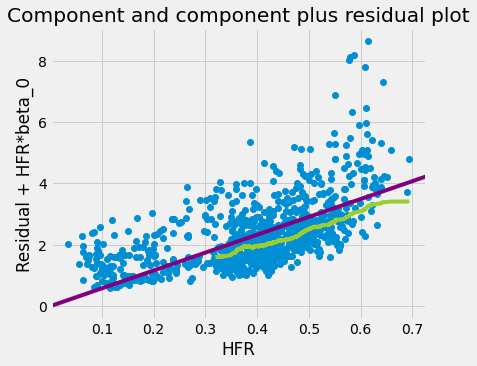

In [252]:
fig, ax = plt.subplots(figsize=(6, 5))
sm.graphics.plot_ccpr(sm_result, predictors2, ax=ax)
ax.lines[1].set_color('purple')
coef = sm_result.params[predictors2]
part_resid = sm_result.resid + coef*fa[predictors2]
df = pd.DataFrame({'x': fa[predictors2], 'y': part_resid})
df = df.sort_values(by='x')
df['smth'] = df['y'].rolling(window=200).mean()
plt.plot(df['x'], df['smth'], color='yellowgreen')

#### Scatter plot

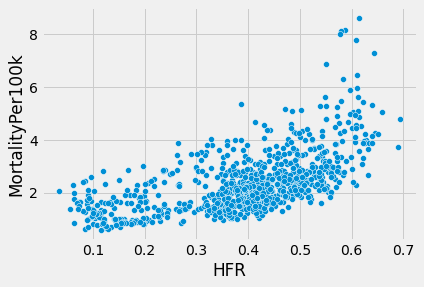

In [253]:
ax = sns.scatterplot(data=fa, x=predictors2, y=outcome2)

It looks like it does not differ from the scatter plot of the data. It only has two additional lines drawn on top of the data points.

# c.

additional code for the plot is from: https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%204%20-%20Regression%20and%20Prediction.ipynb

In [260]:
import statsmodels.formula.api as smf
formula = 'MortalityPer100k ~' + 'bs(HFR, df=5, degree=3)'
model_spline = smf.ols(formula=formula, data=fa)
result_spline = model_spline.fit()
print(result_spline.summary())

                            OLS Regression Results                            
Dep. Variable:       MortalityPer100k   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     150.4
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          7.23e-116
Time:                        12:07:30   Log-Likelihood:                -1096.1
No. Observations:                 900   AIC:                             2204.
Df Residuals:                     894   BIC:                             2233.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

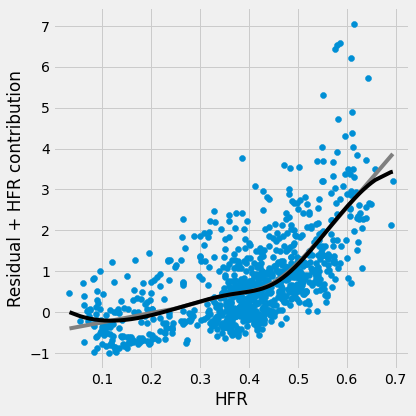

In [259]:
def partialResidualPlot(model, df, outcome, feature, ax):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    ax.scatter(results.feature, results.ypartial + results.residual)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(6, 6))
partialResidualPlot(result_spline, fa, 'MortalityPer100k', 'HFR', ax)

plt.tight_layout()
plt.show()

Yes, the spline improve the fit to the data. Comparing the AIC values of the two model, spline model's lower AIC indicates a better fit to the model.

# d.

What I see from this comparison is as the gun ownership increases, the mortality does not increase linearly but in a more and more increasing rate. This can be seen in the "Miller, Azrael, and Hemenway (2002) American Journal of Public Health 92(12), 1988-9" writing as the authors' explanation: "we found that in areas where household firearm ownership rates were higher, a disproportionately large number of people died from homicide." So, there isn't linear increase between the two variables.

# Question 5

In [267]:
food_df = pd.read_csv("FoodAccessResearchAtlasIL.csv")

In [268]:
food_df.head(5)

,CensusTract,County,PovertyRate,MedianFamilyIncome,Urban,LowAccessOneMileUrban10Rural,LowAccessHalfMileUrban10Rural,LowAccessHalfMile,LowAccessOneMile,Population,PrcntWhite,PrcntAA,PrcntHispanic,PrcntNoVehicle,PrcntSNAP
0,17001000100,Adams County,8.162816,58000.0,1,1,1,1,1,4627.0,95.353361,1.339961,1.556084,2.528636,6.181111
1,17001000201,Adams County,14.623116,54509.0,1,0,1,1,0,1986.0,94.763343,2.668681,0.906344,2.719033,5.589124
2,17001000202,Adams County,16.235693,61887.0,1,0,1,1,0,2999.0,89.629877,7.169056,2.067356,1.600534,2.634211
3,17001000400,Adams County,27.321541,39444.0,1,0,1,1,0,4322.0,81.605738,13.465988,1.804720,7.450255,10.458121
4,17001000500,Adams County,16.506410,47727.0,1,0,1,1,0,2337.0,80.102696,16.260163,0.770218,6.546855,8.686350


### First model

In [269]:
predictors = ['MedianFamilyIncome', 'PrcntSNAP', 'PrcntAA', 'PrcntNoVehicle', 'PrcntHispanic']
outcome = 'LowAccessHalfMile'

In [271]:
food_df = food_df.dropna(subset=predictors+[outcome])
#food_df[predictors] = normalize_df(food_df, predictors, outcome)[predictors]
X, y = food_df[predictors], food_df[outcome]
logit_reg_sm = sm.GLM(y, X.assign(const=1),family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

logodds = logit_result.predict(X.assign(const=1)) # yhat
phat = logodds.apply(lambda yhat: 1/(1+np.exp(-1*yhat)))
phat = pd.DataFrame({'Good': list(1-phat), 'Low': list(phat)})
print(phat.describe()) # summary of the values

                 Generalized Linear Model Regression Results                  
Dep. Variable:      LowAccessHalfMile   No. Observations:                 3094
Model:                            GLM   Df Residuals:                     3088
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1817.6
Date:                Wed, 19 Oct 2022   Deviance:                       3635.2
Time:                        15:19:57   Pearson chi2:                 3.11e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
MedianFamilyIncome  1.335e-05   1.66

In [281]:
classes = []
for i in logodds:
    if i>=0.5:
        classes.append(1)
    elif i< 0.5:
        classes.append(0)

In [285]:
import sklearn.metrics as skm
from sklearn.metrics import classification_report
print('Accuracy = ', skm.accuracy_score(y, classes))
print('Precision = ',skm.precision_score(y, classes))
print('Recall = ', skm.recall_score(y, classes))
print('F1 score = ', skm.f1_score(y, classes))

Accuracy =  0.7087912087912088
Precision =  0.7047229453328375
Recall =  0.9465534465534465
F1 score =  0.8079300788744403


In [290]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y, classes))

[[ 298  794]
 [ 107 1895]]


### Second Model

In [291]:
food_u = food_df[food_df['Urban']==1]

In [292]:
food_u.head(5)

,CensusTract,County,PovertyRate,MedianFamilyIncome,Urban,LowAccessOneMileUrban10Rural,LowAccessHalfMileUrban10Rural,LowAccessHalfMile,LowAccessOneMile,Population,PrcntWhite,PrcntAA,PrcntHispanic,PrcntNoVehicle,PrcntSNAP
0,17001000100,Adams County,8.162816,58000.0,1,1,1,1,1,4627.0,95.353361,1.339961,1.556084,2.528636,6.181111
1,17001000201,Adams County,14.623116,54509.0,1,0,1,1,0,1986.0,94.763343,2.668681,0.906344,2.719033,5.589124
2,17001000202,Adams County,16.235693,61887.0,1,0,1,1,0,2999.0,89.629877,7.169056,2.067356,1.600534,2.634211
3,17001000400,Adams County,27.321541,39444.0,1,0,1,1,0,4322.0,81.605738,13.465988,1.804720,7.450255,10.458121
4,17001000500,Adams County,16.506410,47727.0,1,0,1,1,0,2337.0,80.102696,16.260163,0.770218,6.546855,8.686350


In [293]:
predictors = ['MedianFamilyIncome', 'PrcntSNAP', 'PrcntAA', 'PrcntNoVehicle', 'PrcntHispanic']
outcome = 'LowAccessHalfMile'

In [294]:
food_u = food_u.dropna(subset=predictors+[outcome])
#food_df[predictors] = normalize_df(food_df, predictors, outcome)[predictors]
X, y = food_u[predictors], food_u[outcome]
logit_reg_sm = sm.GLM(y, X.assign(const=1),family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

logodds = logit_result.predict(X.assign(const=1)) # yhat
phat = logodds.apply(lambda yhat: 1/(1+np.exp(-1*yhat)))
phat = pd.DataFrame({'Good': list(1-phat), 'Low': list(phat)})
print(phat.describe()) # summary of the values

                 Generalized Linear Model Regression Results                  
Dep. Variable:      LowAccessHalfMile   No. Observations:                 2604
Model:                            GLM   Df Residuals:                     2598
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -885.00
Date:                Wed, 19 Oct 2022   Deviance:                       1770.0
Time:                        21:16:10   Pearson chi2:                 3.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
MedianFamilyIncome -1.051e-05   2.05

In [295]:
classes = []
for i in logodds:
    if i>=0.5:
        classes.append(1)
    elif i< 0.5:
        classes.append(0)

In [296]:
import sklearn.metrics as skm
from sklearn.metrics import classification_report
print('Accuracy = ', skm.accuracy_score(y, classes))
print('Precision = ',skm.precision_score(y, classes))
print('Recall = ', skm.recall_score(y, classes))
print('F1 score = ', skm.f1_score(y, classes))

Accuracy =  0.8609831029185868
Precision =  0.8824626865671642
Recall =  0.945054945054945
F1 score =  0.9126869271587073


In [297]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y, classes))

[[ 350  252]
 [ 110 1892]]


If I had to choose, I would probably choose the second model. The accuracy and precision of the second model have better scores. And the p-values of the second model's coefficients are lower, indicating significance. I would say that it is a moderately good model. However, from it's metrics, it can be seen that there is still room to grow. From the confusion matrix, it can be seen that prediction for the true 0s are still low -- false predictions are almost as mush as the true ones. Still, even this results is better than the prediction for the 0s of the first model.